In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jiraphatjamprasert/Desktop/ProjectHub/MachineLearning/my_lab/daracuicide_in_th/datasuicide_th.csv')

In [2]:
df.tail()

,year,Rate_per_hundred_thousand_population
18,2544,7.74
19,2543,8.40
20,2542,8.59
21,2541,8.12
22,2540,6.92


In [3]:
df.Rate_per_hundred_thousand_population = df.Rate_per_hundred_thousand_population.astype(float)

In [4]:
df.dtypes

year                                      int64
Rate_per_hundred_thousand_population    float64
dtype: object

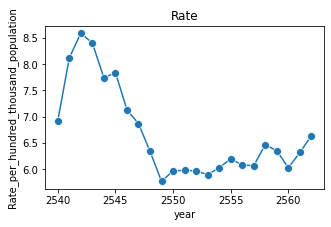

In [5]:
plt.figure(figsize=(5,3))
sns.lineplot(x= df.year,y= df.Rate_per_hundred_thousand_population, marker='o', markersize=8)
plt.title('Rate')
plt.show()

In [6]:
x = df.year.values.reshape(-1,1)
y = df.Rate_per_hundred_thousand_population

x[:5], y[:5]

(array([[2562],
        [2561],
        [2560],
        [2559],
        [2558]]),
 0    6.64
 1    6.32
 2    6.03
 3    6.35
 4    6.47
 Name: Rate_per_hundred_thousand_population, dtype: float64)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

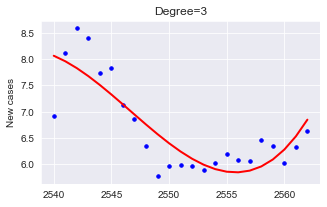

In [8]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')

plt.figure(figsize=(5,3))
plt.scatter(x, y, color='b',s=12)  
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('New cases')
plt.title('Degree=3')
plt.show()

In [9]:
from sklearn.metrics import  r2_score
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

R2 = 0.72499 


In [10]:
#predict
x_input = []
for y in range(2540,2570,+2):
    x_input.append(y)

x_input = np.array(x_input).reshape(-1,1)

#x_input = [[2540],[2545],[2550],[2555],[2560],[2565],[2570],[2575]]
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
y_poly_pred

array([ 8.06466785,  7.82911112,  7.50829743,  7.13880738,  6.75730808,
        6.40055323,  6.10538308,  5.90872442,  5.84759063,  5.95908161,
        6.28038383,  6.84877033,  7.70160069,  8.87632106, 10.41046412])

In [11]:
for i in range(len(x_input)):
  print('year : ',x_input[i][0],' predict : ',y_poly_pred[i])  

year :  2540  predict :  8.064667851664126
year :  2542  predict :  7.829111115075648
year :  2544  predict :  7.508297433145344
year :  2546  predict :  7.1388073759153485
year :  2548  predict :  6.75730808172375
year :  2550  predict :  6.40055323485285
year :  2552  predict :  6.1053830767050385
year :  2554  predict :  5.908724424429238
year :  2556  predict :  5.847590629942715
year :  2558  predict :  5.959081609733403
year :  2560  predict :  6.280383829958737
year :  2562  predict :  6.84877033252269
year :  2564  predict :  7.701600690372288
year :  2566  predict :  8.876321055926383
year :  2568  predict :  10.410464123822749


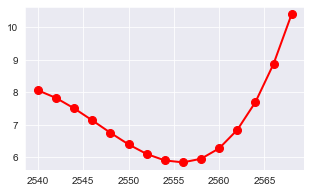

In [12]:
plt.figure(figsize=(5,3))
plt.plot(x_input, y_poly_pred, linewidth='2', color='r',marker='o', markersize=8) 